# Naive Forecasting.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Function to plot time series 
def plotTimeSeries(time, series, format="-", start=0, end=None, label=None):
  plt.plot(time[start:end],series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

# For trend representation
def trend(time, slope=0):
  return slope*time

# for seasonalPattern
def seasonalPattern(seasonal):
  return np.where(seasonal <0.4,
                  np.cos(seasonal*2*np.pi),
                  1/np.exp(3* seasonal))

# for seasonality 
def seasonality (time, period, amplitude=1, phase =0 ):
  seasonal = ((time+phase)% period) /period
  return amplitude * seasonalPattern(seasonal)

# Genrating white noise 
def whiteNoise( time, noise_level =1 , seed =None):
  rand =np.random.RandomState(seed)
  return rand.randn(len(time))*noise_level

## Trend + seasonality


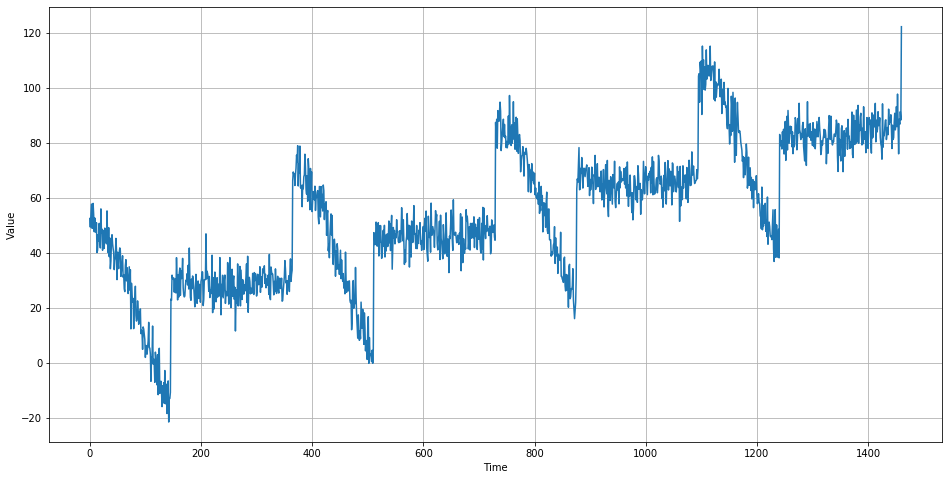

In [3]:
time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

noise_level = 5
noise = whiteNoise(time, noise_level, seed=42)

series += noise

plt.figure(figsize=(16, 8))
plotTimeSeries(time, series)
plt.show()

Let's try forecasting now. We can split things in 2 period. 
- the training period. 
- the validation period.
- (In many case you will also want the test period.)
- The split will be at time stamp 1000.

In [0]:
split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid  =series[split_time:]

## Naive Forecasting 

In [0]:
naiveForecast = series[split_time - 1 : -1]

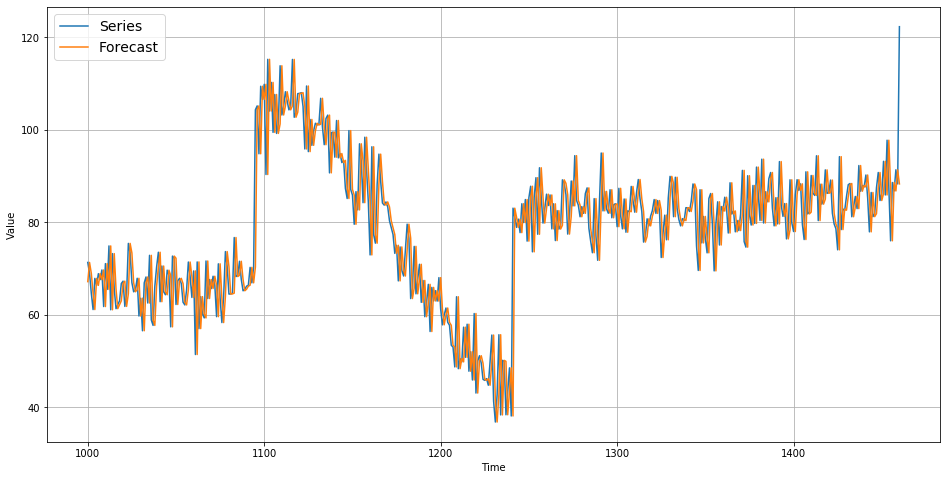

In [6]:
plt.figure(figsize=(16,8))

plotTimeSeries(time_valid, x_valid,label="Series")
plotTimeSeries(time_valid, naiveForecast, label= "Forecast")



Let's Zoom in on the start of our validation period:

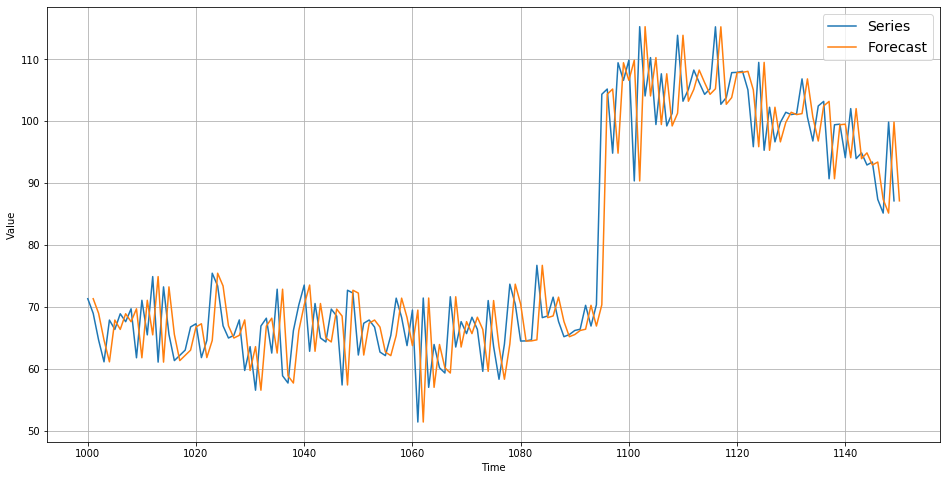

In [7]:
plt.figure(figsize=(16,8))

plotTimeSeries(time_valid,x_valid, start=0, end=150, label="Series")
plotTimeSeries(time_valid, naiveForecast, start=1 , end=151, label="Forecast")

 We can see that the naive forcast lags 1 step behind the time series

## Compute mean absolute error 
- between the forcast and the predictions in the validation period

In [8]:
errors =naiveForecast - x_valid
abs_errors = np.abs(errors)
mae = abs_errors.mean()
mae 

5.9379085153216735